In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")

In [ ]:
df.head()

In [ ]:
df.drop(['CustomerId','RowNumber','Surname'],axis='columns',inplace=True)

In [ ]:
df.head()

In [ ]:
df.dtypes

#Data Analysis

In [ ]:
df.head()

In [ ]:
df.nunique()

## We will plot a Pie Chart 

In [ ]:
labels = 'Exited(Churned)', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
 # We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

In [ ]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

In [ ]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

## Feature Engineering

### Making a new column BalanceSalaryRatio

In [ ]:
df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 5)

In [ ]:
df['TenureByAge'] = df.Tenure/(df.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 1)
plt.show()

#### Printing the categorical variables

In [ ]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [ ]:
print_unique_col_values(df)

### Label Encoding

In [ ]:
df['Gender'].replace({'Male': 1,'Female': 0},inplace=True)

### One Hot Encoding method

In [ ]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.head()

In [ ]:
scale_var = ['Tenure','CreditScore','Age','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[scale_var] = scaler.fit_transform(df1[scale_var])

In [ ]:
df1.head()

In [ ]:
X = df1.drop('Exited',axis='columns')  ##independent features
y = df1['Exited']  ##dependent feature

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
len(X_train.columns)

In [77]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(12, input_dim=14, activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 2s 4ms/step - loss: 0.5553 - accuracy: 0.7945
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4865 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4905 - accuracy: 0.7931
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4680 - accuracy: 0.7949
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4563 - accuracy: 0.7949
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4449 - accuracy: 0.7962
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4358 - accuracy: 0.7964
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4252 - accuracy: 0.8041
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4426 - accuracy: 0.8069
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4584 - accura

In [78]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3503 - accuracy: 0.8560


[0.3502988815307617, 0.8560000061988831]

In [79]:
yp = model.predict(X_test)
yp

array([[0.01813132],
       [0.07328621],
       [0.08444721],
       ...,
       [0.00705492],
       [0.00438473],
       [0.0576461 ]], dtype=float32)

### Converting our predictions to 0,1 to check accuracy

In [80]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [81]:
y_pred  

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


### Checking the accuracy 

In [82]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.75      0.43      0.55       405

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



Text(69.0, 0.5, 'Truth')

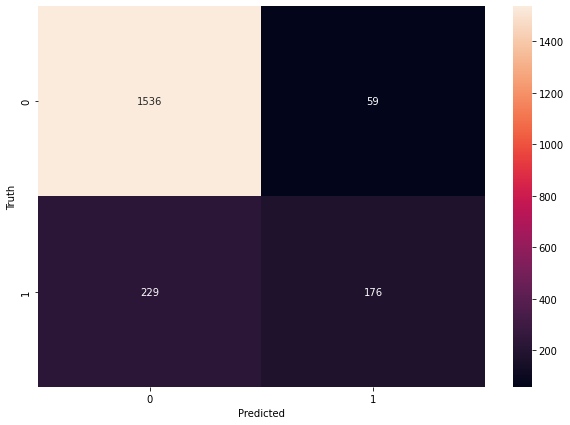

In [83]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [84]:
from sklearn.metrics import accuracy_score

In [85]:
print("Accuracy score is: ", accuracy_score(y_test,y_pred)*100,"%")

Accuracy score is:  85.6 %
